IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

CREATE PCA CLASS

In [ ]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components #Number of principal components to compute
        self.components = None #Principal components
        self.mean = None #Column average of observations' matrix
        self.max = None #Column max of observations' matrix

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.max = X.max(axis = 0)
        X = X - self.mean #Mean centering of each feature
        X = X / self.max #Normalization of each feature

        X = X.T #Transpose of observations' matrix

        U, S, Vh = np.linalg.svd(X) #Singular Value Decomposition
        self.components = U[:,:self.n_components] #Selection of the number of principal components of interest
        self.variance = S #Variance of explained by each principal component

    def transform(self, X):
        # projects data
        X = X - self.mean #Mean centering of each feature
        X = X / self.max #Normalization of each feature

        X = X.T #Transpose of observations' matrix

        return np.dot(self.components.T, X), self.variance

LOAD DATA

In [ ]:
data = datasets.load_iris()
X = data.data #150 Observations each inlcuding 4 features
y = data.target #Information regarding the type of species

RUN PCA

In [ ]:
# Testing
if __name__ == "__main__":

    #Project the data onto the 2 primary principal components
    pca = PCA(2)
    pca.fit(X)
    X_projected, S = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1 = X_projected[0, :]
    x2 = X_projected[1, :]

Shape of X: (150, 4)
Shape of transformed X: (2, 150)


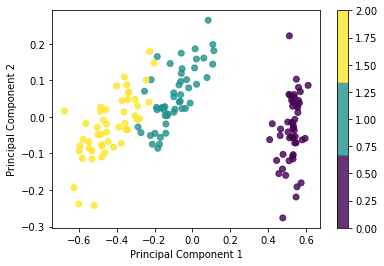

In [ ]:
#Plot the projected data
plt.scatter(
    x1, x2, c=y,  alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.savefig('2Iris.jpg', bbox = 'tight', dpi =400)
plt.show()

COMPUTE PERCENTAGE OF VARIANCE EXPLAINED BY EACH PRINCIPAL COMPONENT

In [ ]:
#Variance explained by different P.C.
print('First P.C. explains %f' %(S[0]*100/np.sum(S))+'% of the total variance.')
print('Second P.C. explains %f' %(S[1]*100/np.sum(S))+'% of the total variance.')

First P.C. explains 68.276926% of the total variance.
Second P.C. explains 16.129641% of the total variance.


Text(0.5, 1.0, 'Cumulative variance plot')

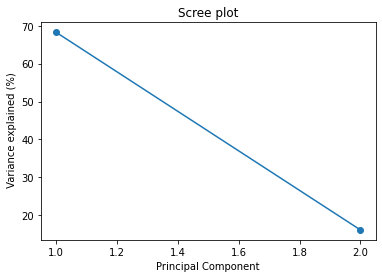

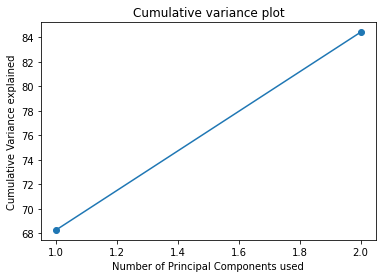

In [ ]:
#Scree plot
plt.figure(0)
plt.plot(np.linspace(1, X_projected.shape[0], X_projected.shape[0],dtype = int), S[0: X_projected.shape[0]]*100/np.sum(S), '-o')
plt.xlabel('Principal Component')
plt.ylabel(' Variance explained (%)')
plt.title('Scree plot')

#Cumulative variance plot
cum_var=[]
for i in range(X_projected.shape[0]):
    cum_var.append(np.sum(S[0: i+1])*100/np.sum(S))

plt.figure(1)
plt.plot(np.linspace(1, X_projected.shape[0], X_projected.shape[0],dtype = int), cum_var, '-o')
plt.xlabel('Number of Principal Components used')
plt.ylabel('Cumulative Variance explained')
plt.title('Cumulative variance plot')
